In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
from collections import Counter 
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Loading the dataset

In [0]:
cancerdf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/breast_cancer63B.csv', sep=',', quotechar='"')


Information of cancerdf

In [0]:
cancerdf.drop(cancerdf.columns[cancerdf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cancerdf['diagnosis'] = cancerdf['diagnosis'].replace({'B': 0})
cancerdf['diagnosis'] = cancerdf['diagnosis'].replace({'M': 1})
cancerdf.diagnosis


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [0]:
#Identifying the target variable 
cancerdf['diagnosis'].value_counts() 

0    357
1    212
Name: diagnosis, dtype: int64

## Data preprocessing

In [0]:
x=cancerdf.drop('diagnosis', axis=1)
y=cancerdf.diagnosis ## Target variable

Split data into train and test 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=90)

Performing standardisation by applying scale function

In [0]:
scalefn=StandardScaler().fit(x_train)
norm_xtrain =scalefn.transform(x_train)
norm_xtest =scalefn.transform(x_test)

Numpy to df conversion

In [0]:
x_train.loc[x_train.index,x_train.columns] = norm_xtrain
x_train.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-4.114520e-17,2.008444e-17,-3.961097e-17,-3.068456e-17,-1.338962e-17,-6.136911e-18,-2.231604e-18,1.450543e-17,3.458986e-17,-1.450543e-17,3.152141e-17,-5.579010e-18,3.277668e-17,1.171592e-17,1.673703e-17,-1.255277e-17,-5.404666e-19,-6.935625e-18,-8.368515e-19,-1.394753e-17,1.157645e-17,-2.231604e-18,7.252713e-18,2.287394e-17,-1.841073e-17,-2.454764e-17,0.000000,2.398974e-17,4.574788e-17,-2.231604e-17,-1.590018e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.325029e-01,-1.812924e+00,-2.227152e+00,-1.798127e+00,-1.346220e+00,-3.179090e+00,-1.631413e+00,-1.121289e+00,-1.269554e+00,-2.332845e+00,-1.874209e+00,-1.032442e+00,-1.545113e+00,-1.018037e+00,-7.001655e-01,-1.886163e+00,-1.344606e+00,-1.012515e+00,-1.945866e+00,-1.347214e+00,-1.086052e+00,-1.562494e+00,-2.213766e+00,-1.556811e+00,-1.135161e+00,-2.649784e+00,-1.412156,-1.288776e+00,-1.750373e+00,-2.033862e+00,-1.554408e+00
25%,-2.258051e-01,-6.638093e-01,-7.551246e-01,-6.567991e-01,-6.377247e-01,-7.067358e-01,-7.384838e-01,-7.389671e-01,-7.449945e-01,-6.983844e-01,-7.327396e-01,-6.080805e-01,-6.796712e-01,-5.899124e-01,-4.713669e-01,-6.377602e-01,-7.284705e-01,-5.378198e-01,-6.836998e-01,-6.431505e-01,-5.770945e-01,-6.580027e-01,-7.336663e-01,-6.726195e-01,-6.279021e-01,-6.946856e-01,-0.712464,-7.640086e-01,-7.686541e-01,-6.841562e-01,-6.819096e-01
50%,-2.255141e-01,-2.419861e-01,-1.109305e-01,-2.443057e-01,-3.137653e-01,-4.634336e-02,-2.607476e-01,-3.707636e-01,-3.991643e-01,-8.717467e-02,-1.749223e-01,-2.774684e-01,-2.469957e-01,-2.693323e-01,-3.228908e-01,-2.033742e-01,-2.634956e-01,-1.823717e-01,-1.654392e-01,-2.264073e-01,-1.955735e-01,-2.768766e-01,-6.599515e-02,-2.873811e-01,-3.421607e-01,-3.409204e-02,-0.277526,-2.279860e-01,-2.145715e-01,-1.179660e-01,-2.501564e-01
75%,-1.645068e-01,4.034884e-01,6.014724e-01,4.398349e-01,2.573858e-01,6.898793e-01,5.097357e-01,5.073275e-01,6.543875e-01,5.532708e-01,5.298996e-01,2.375286e-01,4.643954e-01,2.155859e-01,6.901351e-02,3.776204e-01,4.294225e-01,3.145439e-01,4.651285e-01,3.372957e-01,2.917379e-01,4.234876e-01,6.809671e-01,4.921217e-01,2.576927e-01,5.866937e-01,0.522139,5.045314e-01,7.094033e-01,4.796791e-01,4.198193e-01
max,6.886835e+00,3.967753e+00,3.392786e+00,3.966121e+00,5.159767e+00,3.326744e+00,3.447287e+00,4.011321e+00,3.646464e+00,4.511973e+00,5.036466e+00,8.779008e+00,6.709031e+00,9.240043e+00,1.041785e+01,5.268409e+00,4.762103e+00,1.151317e+01,6.756793e+00,4.998158e+00,9.772553e+00,4.082091e+00,3.888798e+00,4.264602e+00,5.837152e+00,3.686319e+00,4.992064,4.582618e+00,2.583428e+00,6.119930e+00,6.621121e+00


In [0]:
x_test.loc[x_test.index,x_test.columns] = norm_xtest
x_test.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000
mean,3.177149e+07,14.203000,19.357018,92.424854,660.104678,0.095930,0.104318,8.659849e-02,4.779316e-02,0.182620,0.062706,0.404437,1.234384,2.872660,39.913444,0.007135,0.026163,3.162147e-02,1.177889e-02,0.020495,0.003807,16.308842,25.785380,107.646140,882.432164,0.131499,0.253565,2.660751e-01,1.118397e-01,0.291952,0.083436
std,1.177258e+08,3.503514,4.329944,24.082455,336.621543,0.014624,0.054480,7.892750e-02,3.851862e-02,0.027477,0.007485,0.268310,0.560000,1.907149,38.534583,0.003422,0.019746,2.653938e-02,6.407850e-03,0.008459,0.002600,4.799512,6.140253,33.154484,548.442733,0.021832,0.148550,1.972671e-01,6.464840e-02,0.063366,0.016649
min,8.670000e+03,6.981000,10.720000,43.790000,143.500000,0.065760,0.034540,-2.677925e-17,-2.231604e-17,0.106000,0.050240,0.111500,0.360200,0.981200,7.228000,0.002667,0.004899,-1.115802e-18,-9.595897e-17,0.007882,0.001126,7.930000,12.870000,50.410000,185.200000,0.084090,0.046190,1.160434e-16,1.115802e-16,0.156500,0.055040
25%,8.815335e+05,11.540000,16.335000,74.085000,404.950000,0.085010,0.063315,2.623500e-02,1.989500e-02,0.163750,0.057595,0.227650,0.823700,1.565500,18.170000,0.005084,0.013690,1.512000e-02,7.599000e-03,0.014875,0.002231,12.840000,21.010000,83.755000,499.850000,0.118500,0.155300,1.203500e-01,6.450000e-02,0.255300,0.071670
50%,9.135050e+05,13.510000,18.900000,87.500000,559.200000,0.095780,0.095880,6.505000e-02,3.279000e-02,0.181300,0.061300,0.309300,1.166000,2.230000,23.240000,0.006113,0.019570,2.509000e-02,1.110000e-02,0.018840,0.003053,15.100000,25.500000,98.910000,699.400000,0.130900,0.217000,2.310000e-01,9.514000e-02,0.282700,0.080520
75%,9.010428e+06,16.220000,21.510000,106.750000,811.750000,0.103450,0.129500,1.293500e-01,6.612000e-02,0.195800,0.065230,0.500550,1.505500,3.363000,48.655000,0.008432,0.032050,4.174500e-02,1.493500e-02,0.023530,0.004433,19.515000,29.460000,129.250000,1170.000000,0.145650,0.337350,3.826000e-01,1.574000e-01,0.315400,0.092195
max,8.810948e+08,24.250000,39.280000,166.200000,1761.000000,0.163400,0.345400,4.268000e-01,2.012000e-01,0.290600,0.095020,1.509000,3.896000,10.120000,233.000000,0.031130,0.135400,1.535000e-01,3.927000e-02,0.078950,0.021930,32.490000,47.160000,214.000000,3432.000000,0.222600,0.932700,9.608000e-01,2.910000e-01,0.544000,0.148600


###Checking the imbalance

####Bar Graph for distribution

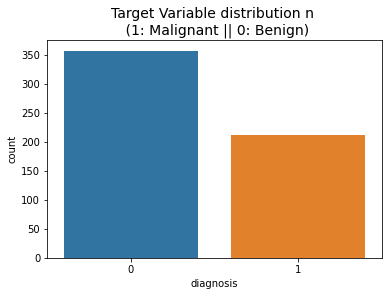

In [0]:
plt.title('Target Variable distribution n \n (1: Malignant || 0: Benign)', fontsize=14)
sns.countplot(y,data=cancerdf)

####Pie Chart Representing Percentage of Imbalance

In [0]:
Benign=len(cancerdf[cancerdf['diagnosis']==0])
Malignant= len(cancerdf[cancerdf['diagnosis']==1])

Benign_percentage= Benign/(Malignant+Benign)
Malignant_percentage= Malignant/(Malignant+Benign)

print("Benign percentage is", Benign_percentage*100)
print("Malignant percentage is", Malignant_percentage*100)

Benign percentage is 62.741652021089635
Malignant percentage is 37.258347978910365


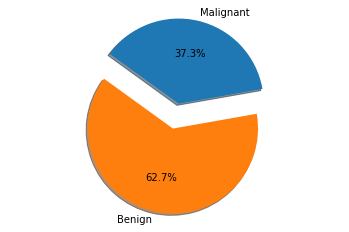

In [0]:
var_value = 'Malignant','Benign'
size=[Malignant_percentage,Benign_percentage]
design=(0.3,0)
fig, axi =plt.subplots()
axi.pie(size,explode=design,labels=var_value,autopct='%1.1f%%', shadow= True, startangle=10)
axi.axis('equal')
plt.show()

###Inspection of Dataset for some features

(array([ 85., 148.,  82.,  42.,  19.,   8.,   7.,   1.,   3.,   3.]),
 array([-1.34721409, -0.71267689, -0.07813968,  0.55639752,  1.19093472,
         1.82547193,  2.46000913,  3.09454634,  3.72908354,  4.36362075,
         4.99815795]),
 <a list of 10 Patch objects>)

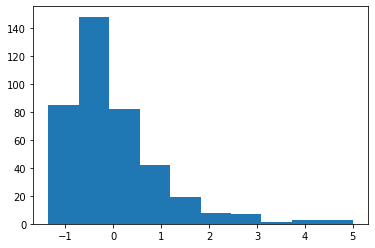

In [0]:
#train data
data = x_train.symmetry_se
plt.hist(data)

(array([47., 69., 35., 15.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([0.007882 , 0.0149888, 0.0220956, 0.0292024, 0.0363092, 0.043416 ,
        0.0505228, 0.0576296, 0.0647364, 0.0718432, 0.07895  ]),
 <a list of 10 Patch objects>)

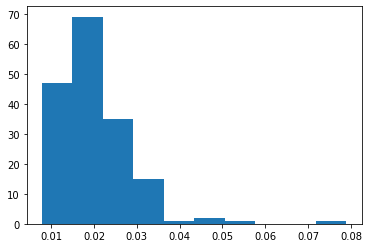

In [0]:
#test data 
data1 = x_test.symmetry_se
plt.hist(data1)

(array([ 89., 167.,  76.,  38.,  18.,   8.,   0.,   1.,   0.,   1.]),
 array([-1.55440808, -0.73685516,  0.08069777,  0.8982507 ,  1.71580363,
         2.53335656,  3.35090949,  4.16846241,  4.98601534,  5.80356827,
         6.6211212 ]),
 <a list of 10 Patch objects>)

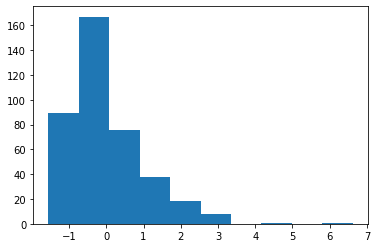

In [0]:
#train data
data = x_train.fractal_dimension_worst
plt.hist(data)

(array([14., 34., 53., 29., 19., 13.,  2.,  5.,  0.,  2.]),
 array([0.05504 , 0.064396, 0.073752, 0.083108, 0.092464, 0.10182 ,
        0.111176, 0.120532, 0.129888, 0.139244, 0.1486  ]),
 <a list of 10 Patch objects>)

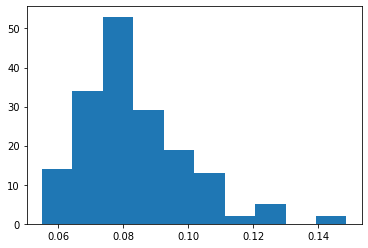

In [0]:
#test data 
data = x_test.fractal_dimension_worst
plt.hist(data)

In [0]:
cancerdf.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
def boxplot(a,b,c,d):
  dfa=pd.DataFrame(a,columns=['Acc_scores'])
  dfa['Pre_scores']=b
  dfa['Rec_scores']=c
  dfa['F1_scores']=d
  plt.figure(6)
  boxplot = dfa.boxplot(column=['Acc_scores','Pre_scores','Rec_scores','F1_scores'])

In [0]:
#Function to establish a baseline and find average and accuracy 
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))
  boxplot(Acc_scores, Pre_scores,Rec_scores,F1_scores)
  


In [0]:
x=cancerdf.drop('diagnosis', axis=1) ##Predictors
y=cancerdf.diagnosis ## Target variable

Accuracy: [0.9122807  0.85964912 0.92982456 0.87719298 0.94736842 0.89473684
 0.9122807  0.94736842 0.92982456 0.98214286]
Precision: [0.86956522 0.85       0.94736842 0.81818182 0.90909091 0.85714286
 1.         0.90909091 0.84       0.95454545]
Recall: [0.90909091 0.77272727 0.85714286 0.85714286 0.95238095 0.85714286
 0.76190476 0.95238095 1.         1.        ]
F1 Score: [0.88888889 0.80952381 0.9        0.8372093  0.93023256 0.85714286
 0.86486486 0.93023256 0.91304348 0.97674419]
Average Accuracy: 0.92 (+/- 0.07)
Average Precision: 0.90 (+/- 0.11)
Average Recall: 0.89 (+/- 0.16)
Average F1 Score: 0.89 (+/- 0.09)


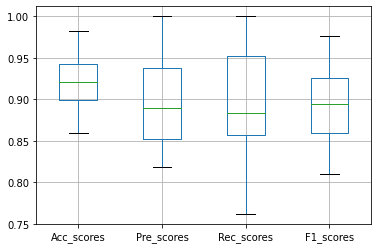

In [0]:
#Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=90)
baseline(decclf,x,y)

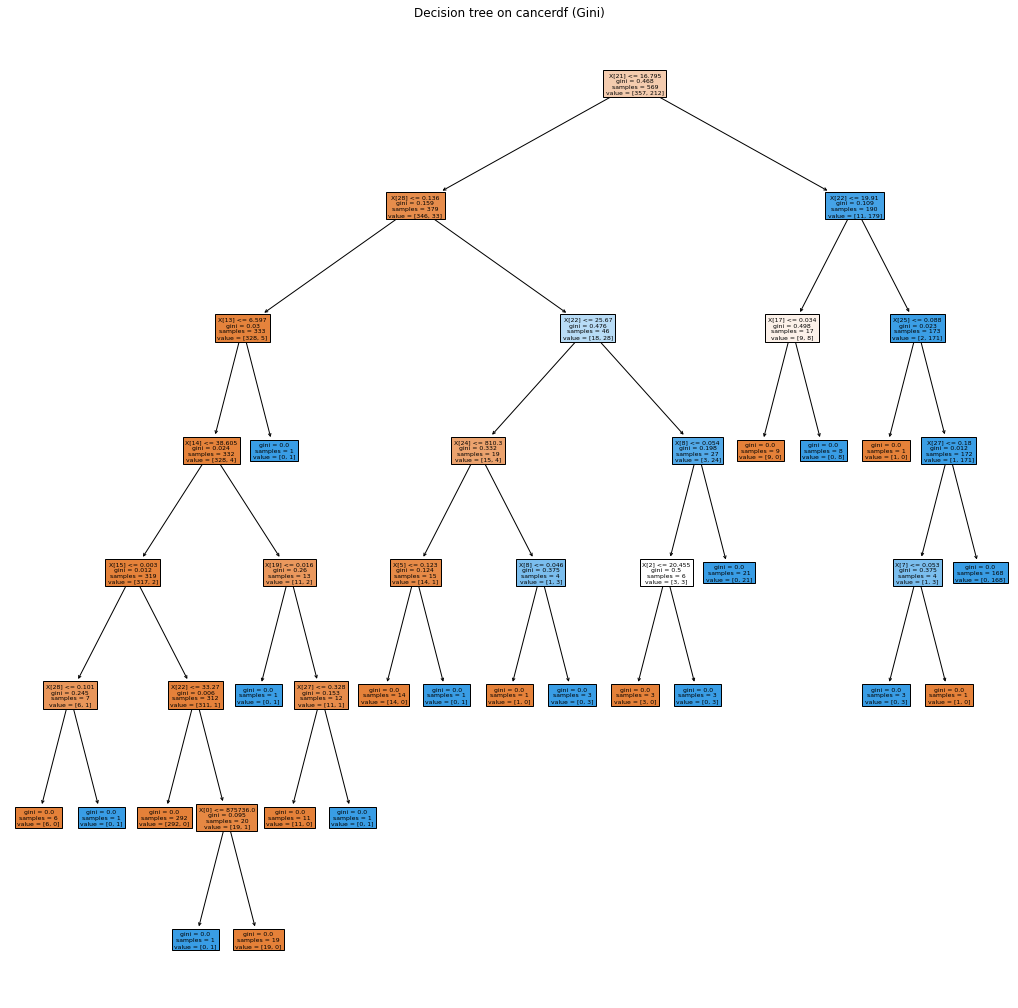

In [0]:
# Decision Tree
plt.figure(figsize=(18,18))
plottree=plot_tree(decclf.fit(x, y),filled=True)
plt.title("Decision tree on cancerdf (Gini)")
plt.show()


Accuracy: [0.98245614 0.87719298 0.9122807  0.96491228 0.98245614 0.98245614
 0.94736842 0.98245614 0.96491228 0.96428571]
Precision: [0.95652174 0.85714286 0.94736842 1.         1.         0.95454545
 0.95       1.         0.90909091 1.        ]
Recall: [1.         0.81818182 0.80952381 0.80952381 0.95238095 1.
 0.9047619  0.95238095 0.95238095 0.95238095]
F1 Score: [0.97777778 0.8372093  0.92682927 0.92307692 0.97560976 0.97674419
 0.92682927 0.97560976 0.93023256 1.        ]
Average Accuracy: 0.96 (+/- 0.07)
Average Precision: 0.96 (+/- 0.09)
Average Recall: 0.92 (+/- 0.14)
Average F1 Score: 0.94 (+/- 0.09)


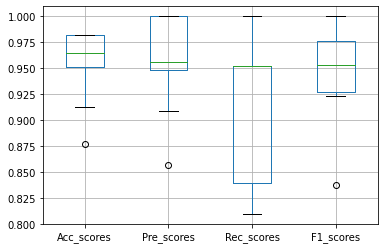

In [0]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 


## Stratified CV 

In [0]:
Folds = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in Folds.split(x, y):
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  print(xtrain.shape)
  print(xtest.shape)
  

>Train: 0=322, 1=190, Test: 0=35, 1=22
(512, 31)
(57, 31)
>Train: 0=322, 1=190, Test: 0=35, 1=22
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=321, 1=191, Test: 0=36, 1=21
(512, 31)
(57, 31)
>Train: 0=322, 1=191, Test: 0=35, 1=21
(513, 31)
(56, 31)


####Training Data

Benign percentage is 62.768031189083814
Malignant percentage is 37.23196881091618


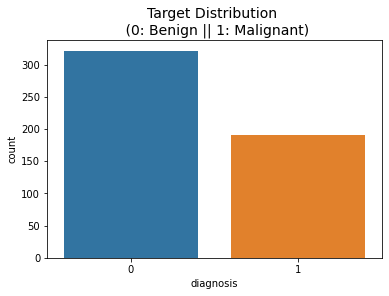

In [0]:
Benign=len(ytrain[ytrain==0])
Malignant= len(ytrain[ytrain==1])

Benign_percentage= Benign/(Malignant+Benign)
Malignant_percentage= Malignant/(Malignant+Benign)

print("Benign percentage is", Benign_percentage*100)
print("Malignant percentage is", Malignant_percentage*100)

plt.title('Target Distribution \n (0: Benign || 1: Malignant)', fontsize=14)
sns.countplot(ytrain,data=xtrain)

####Test Data

Benign percentage is 62.5
Malignant percentage is 37.5


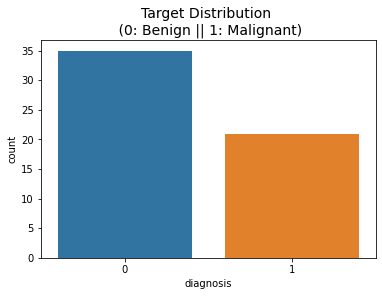

In [0]:
Benign=len(ytest[ytest==0])
Malignant= len(ytest[ytest==1])

Benign_percentage= Benign/(Malignant+Benign)
Malignant_percentage= Malignant/(Malignant+Benign)

print("Benign percentage is", Benign_percentage*100)
print("Malignant percentage is", Malignant_percentage*100)

plt.title('Target Distribution \n (0: Benign || 1: Malignant)', fontsize=14)
sns.countplot(ytest,data=xtest)

Skewed K folds is completed as both test and traing data share the same balance ratio.

##Elbow and Silhoutte method

In [0]:
#Elbow method function
def elbow():
  Sum_of_squared_distances = []
  K = range(1,30)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('dist(Sun of squares)')
  plt.title('Optimal K: Elbow Method')
  plt.show()

In [0]:
def silhoutte():
  silhoutte=[]
  k_silhoutte= range(2,10)
  for k_s in k_silhoutte:
    print(k_silhoutte,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    silhoutte.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(k_silhoutte,silhoutte, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Optimal K: Silhoutte Method')
  plt.show

##Summerise the distributions

Begin process
-------------------------------------------------------


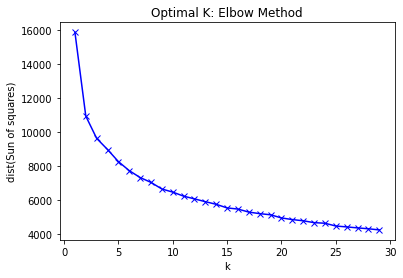

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [3 1 2 1 2 3 1 2 2 1 2 1 0 4 0 4 3 4 4 2 1 2 0 2 1 1 1 2 2 1 4 2 3 3 3 2 2
 4 2 4 2 2 4 0 4 0 4 4 1 4 0 3 4 4 4 1 4 4 4 4 1 1 2 0 2 3 4 0 0 0 2 4 2 4
 2 2 0 2 0 0 0 2 4 0 2 4 0 0 4 1 4 4 0 4 1 1 0 4 0 2 0 0 0 4 2 3 4 2 0 0 2
 2 0 4 0 1 4 0 0 1 1 0 0 3 3 2 0 0 4 2 0 0 0 1 0 0 1 1 0 1 2 2 1 4 2 3 1 4
 4 4 2 4 0 2 0 3 2 1 1 4 0 2 2 0 4 4 2 0 0 0 0 0 1 2 0 0 2 4 0 3 2 0 2 0 0
 1 0 2 4 0 1 4 4 3 0 3 2 2 4 3 1 3 1 2 0 2 0 2 3 4 0 0 4 0 0 3 4 2 4 0 2 0
 0 2 0 2 1 0 0 4 0 4 0 1 0 4 0 0 0 0 0 0 4 3 4 3 4 0 0 0 0 0 0 0 0 0 0 4 0
 0 2 1 0 4 2 4 3 0 0 0 0 2 2 2 4 4 0 0 2 4 2 4 3 4 4 4 2 4 4 0 0 0 4 0 1 3
 2 0 4 4 0 4 0 0 0 0 0 0 2 3 0 2 3 1 0 2 2 0 4 1 0 0 1 4 0 4 4 0 0 0 0 4 2
 0 4 1 3 4 0 4 0 0 0 1 0 0 0 0 4 0 0 2 0 0 0 0 4 0 4 4 3 0

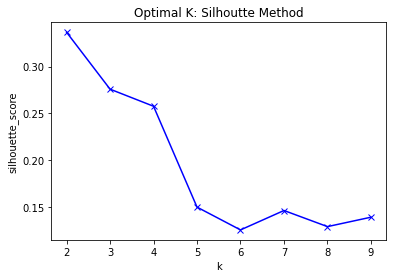

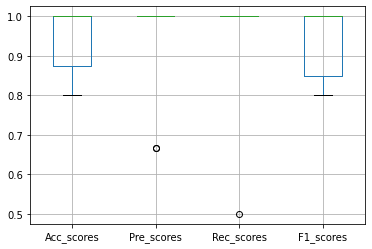

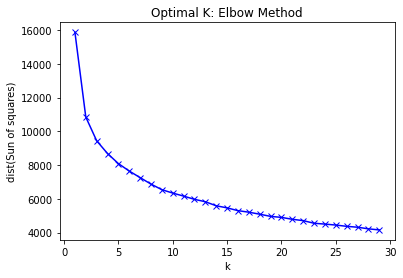

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [4 2 2 0 2 0 2 0 0 0 1 2 4 2 0 0 2 0 2 3 3 3 0 2 2 1 3 3 1 1 1 1 1 1 2 0 1
 3 3 3 0 3 0 2 3 1 0 1 2 0 0 3 1 2 3 4 4 1 3 0 4 2 3 2 3 2 3 3 1 3 1 1 2 2
 3 3 3 3 1 0 4 0 0 2 2 4 1 2 2 2 2 2 1 2 2 0 1 3 1 2 1 1 1 3 2 2 3 2 1 1 2
 2 1 3 1 0 3 1 1 0 2 1 1 4 4 2 3 1 3 2 1 1 1 0 1 1 0 0 1 0 2 2 2 3 2 4 0 3
 3 3 2 3 1 2 1 4 0 0 0 3 3 2 2 1 3 3 2 1 1 1 1 1 0 2 1 1 2 3 1 4 2 1 2 1 1
 0 1 2 3 1 0 3 3 4 1 4 2 2 3 4 0 4 0 2 1 2 1 2 2 3 1 1 3 1 3 4 3 2 3 1 2 1
 1 2 1 2 2 3 1 3 1 3 1 0 1 3 1 1 1 1 1 1 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 3 1
 1 2 0 1 3 2 3 4 1 1 1 1 2 2 2 3 3 1 1 2 3 2 3 4 3 3 3 2 3 3 1 1 3 3 1 0 4
 2 1 3 3 1 3 1 1 1 1 1 1 2 4 1 2 4 0 1 2 2 1 3 0 1 3 0 3 1 3 3 1 1 1 1 3 2
 3 3 2 4 3 1 3 1 1 1 0 1 1 1 1 3 1 3 2 1 1 3 1 3 1 3 3 4 1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [1.         1.         0.83333333 1.         1.         0.5
 0.66666667 1.         1.         1.        ]
Precision: [1.         1.         0.66666667 1.         1.         0.33333333
 0.         1.         1.         1.        ]
Recall: [1.  1.  1.  1.  1.  0.5 0.  1.  1.  1. ]
F1 Score: [1.  1.  0.8 1.  1.  0.4 0.  1.  1.  1. ]
Average Accuracy: 0.90 (+/- 0.34)
Average Precision: 0.80 (+/- 0.68)
Average Recall: 0.85 (+/- 0.64)
Average F1 Score: 0.82 (+/- 0.66)
-------------------------------------------------------
Begin process
-------------------------------------------------------


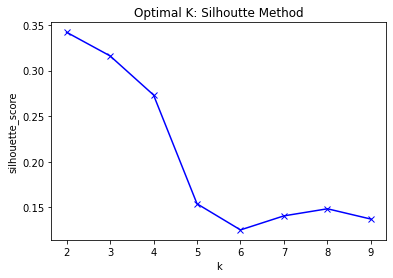

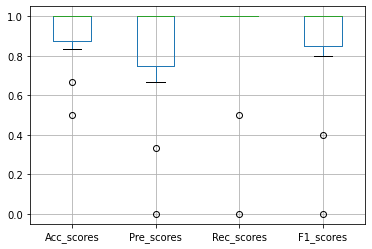

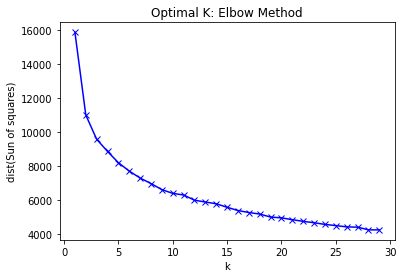

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [3 1 1 2 1 2 1 2 2 2 4 1 3 1 2 2 1 2 1 4 4 0 2 1 1 3 2 1 2 1 3 2 1 1 2 1 2
 4 4 2 4 0 3 2 4 1 0 2 4 4 4 4 4 1 4 4 0 0 0 0 0 4 2 4 0 4 0 4 0 2 4 0 0 4
 4 4 0 0 4 4 0 4 0 0 2 0 4 3 4 0 0 2 0 0 4 0 2 2 1 4 1 3 4 4 4 4 1 0 1 0 1
 1 4 1 4 4 4 1 0 4 1 0 4 4 0 2 0 4 4 0 2 2 1 1 3 1 1 1 4 2 1 3 3 1 4 1 2 2
 2 2 1 1 2 1 3 2 4 1 1 3 1 2 2 1 1 0 1 4 4 4 4 4 2 1 4 4 1 0 4 3 1 4 1 4 4
 2 4 1 0 4 2 0 4 3 4 3 1 1 0 3 2 3 2 1 4 1 4 1 3 0 4 4 0 4 4 3 0 1 0 4 1 4
 4 1 4 1 2 4 4 0 4 0 4 2 4 0 4 4 4 4 4 4 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 0 4
 4 1 2 4 0 1 4 3 4 4 4 4 1 1 1 0 0 4 4 1 4 1 0 3 4 0 0 1 0 0 4 4 4 0 4 2 3
 1 4 0 0 4 0 4 4 4 4 4 4 1 3 4 3 3 2 4 1 1 4 4 2 4 4 2 0 4 4 0 4 4 4 4 0 1
 4 0 1 3 0 4 4 4 4 4 2 4 4 4 4 0 4 4 1 4 4 4 4 4 4 0 0 3 4

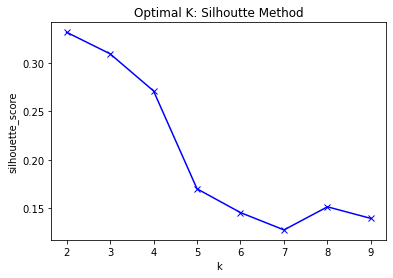

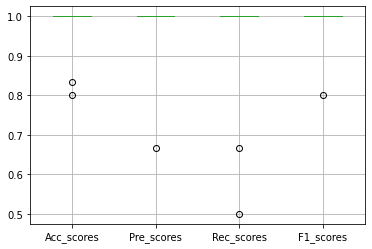

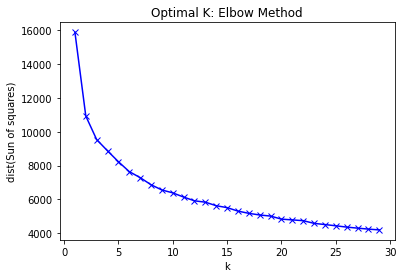

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [3 2 2 1 2 1 2 1 1 1 0 2 3 0 1 1 2 1 2 4 4 4 1 2 2 3 1 2 1 2 3 1 2 2 1 2 1
 0 0 1 0 4 3 1 4 2 4 1 4 0 0 0 0 2 0 0 2 1 0 4 4 4 1 4 1 1 4 0 1 0 2 1 1 4
 0 2 4 3 3 0 4 1 3 2 4 2 4 2 4 4 0 4 0 0 2 2 4 4 4 4 4 0 4 4 4 0 4 4 4 1 4
 4 4 4 4 4 0 0 4 4 0 0 0 4 0 4 0 0 4 4 4 0 4 1 1 4 4 0 0 0 0 4 4 2 0 0 2 2
 0 4 0 1 4 0 0 1 1 0 0 3 3 2 0 0 4 2 0 0 0 1 0 0 1 1 0 1 2 2 1 4 2 3 1 4 0
 4 2 1 0 2 0 3 1 1 1 4 0 2 2 0 4 2 1 2 2 3 2 2 2 3 3 2 2 4 3 1 3 1 2 0 2 0
 2 3 3 2 2 2 2 1 0 4 0 1 0 4 0 0 0 0 0 0 4 3 4 3 4 0 0 0 0 0 0 0 0 0 0 4 0
 0 2 1 0 4 2 4 3 0 0 0 0 2 1 2 4 4 0 0 2 4 2 4 3 4 4 4 2 4 4 0 0 4 4 0 1 3
 2 0 4 4 0 4 4 0 0 0 0 0 2 3 0 2 3 1 0 2 2 0 4 1 0 0 1 4 0 0 4 0 0 0 0 4 2
 4 4 1 3 4 0 4 0 0 0 1 0 0 0 0 4 0 0 2 0 0 4 0 0 0 4 4 3 0

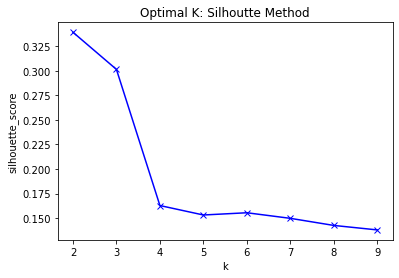

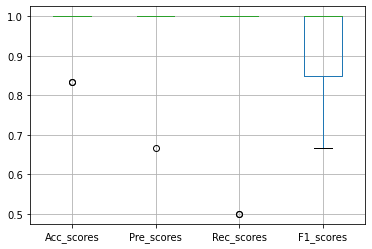

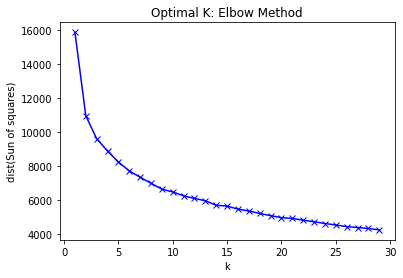

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [4 0 0 3 0 3 0 3 3 3 2 0 4 2 3 3 2 0 0 1 1 1 3 0 0 4 3 0 0 0 0 3 0 0 0 0 0
 2 2 1 2 1 4 1 2 0 1 3 1 2 2 2 2 0 2 1 0 0 2 1 1 1 3 1 0 0 1 2 3 2 0 3 0 1
 2 0 1 4 4 2 1 3 4 0 1 0 1 0 1 1 2 2 2 2 0 0 1 1 1 1 2 1 2 1 1 3 1 2 4 1 1
 1 3 1 1 1 1 0 3 0 1 0 4 1 2 2 2 0 1 0 1 0 0 2 0 2 2 2 0 1 1 0 1 2 2 1 3 1
 1 2 1 3 3 1 1 2 0 2 2 2 1 0 0 1 2 1 2 1 1 2 1 3 2 2 1 1 2 1 2 2 2 2 1 1 2
 1 2 1 2 0 2 4 3 3 3 1 2 0 0 2 1 1 0 2 2 1 2 2 3 0 2 2 0 1 2 4 0 2 0 2 2 3
 2 0 1 2 3 1 1 4 2 4 0 0 1 4 3 4 0 0 2 0 2 0 4 1 2 2 1 2 1 4 1 2 1 2 2 2 2
 0 2 0 0 2 2 1 2 4 4 0 0 0 0 0 0 1 2 2 0 1 0 1 4 1 1 1 0 1 1 2 2 1 1 2 3 4
 0 2 1 1 2 1 1 2 2 2 2 2 0 4 2 4 4 0 2 0 0 2 1 3 2 2 3 1 2 2 1 2 2 2 2 1 0
 1 1 0 4 1 2 1 2 2 2 3 2 2 2 2 1 2 2 0 2 2 1 2 2 2 1 1 4 2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [1.         0.66666667 1.         1.         1.         0.66666667
 1.         1.         1.         1.        ]
Precision: [1.  0.5 1.  1.  1.  0.  1.  1.  1.  1. ]
Recall: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
F1 Score: [1.  0.8 1.  1.  1.  0.  1.  1.  1.  1. ]
Average Accuracy: 0.93 (+/- 0.27)
Average Precision: 0.85 (+/- 0.64)
Average Recall: 0.90 (+/- 0.60)
Average F1 Score: 0.88 (+/- 0.60)
-------------------------------------------------------
Begin process
-------------------------------------------------------


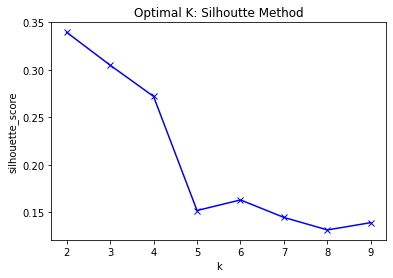

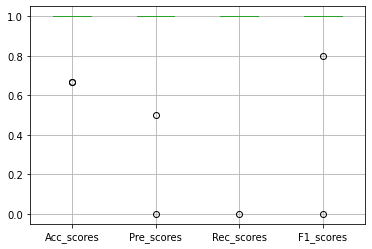

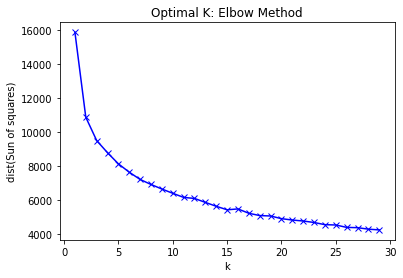

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [1 3 3 2 3 2 3 2 2 2 4 3 1 3 2 2 3 3 3 4 4 0 2 3 3 1 2 3 3 3 1 2 3 3 3 3 3
 4 4 3 4 0 1 3 4 3 0 2 4 4 4 4 4 3 4 4 3 3 4 0 0 0 2 0 3 3 0 4 2 4 3 2 3 4
 4 3 0 1 1 4 0 2 1 3 4 3 0 3 0 3 4 3 4 4 3 3 4 0 4 0 4 0 4 0 0 2 0 4 1 0 0
 0 2 0 0 0 0 3 2 3 4 3 1 4 4 4 4 3 3 3 0 3 3 4 3 4 4 4 3 0 4 3 0 4 4 0 2 0
 4 4 0 2 2 4 0 4 3 4 4 4 0 3 1 0 3 4 4 3 3 4 4 4 3 0 4 4 2 3 4 4 1 1 3 4 4
 0 3 4 4 4 2 4 4 2 3 4 2 3 3 3 0 3 1 2 0 0 0 4 4 0 0 4 4 0 4 4 4 4 4 4 4 0
 4 4 4 4 2 4 0 4 2 0 4 4 3 1 2 1 3 3 4 3 4 3 1 0 4 4 0 4 4 1 0 3 0 4 3 4 4
 3 4 3 3 4 4 0 4 0 4 2 4 0 4 4 4 4 4 4 0 1 4 1 0 4 4 4 4 4 4 4 4 4 4 0 4 4
 3 2 4 0 3 4 1 4 4 4 4 3 3 3 0 3 3 1 3 2 1 3 3 1 1 1 3 3 3 2 0 4 4 4 4 0 3
 4 0 3 1 0 4 4 4 4 4 2 4 4 4 4 0 4 4 3 4 4 4 4 4 4 0 0 1 4

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [0.66666667 0.83333333 0.83333333 1.         1.         1.
 0.83333333 1.         1.         1.        ]
Precision: [1.         1.         0.         1.         1.         1.
 0.66666667 0.66666667 0.66666667 1.        ]
Recall: [0.66666667 1.         0.5        1.         1.         1.
 1.         1.         1.         1.        ]
F1 Score: [0.5        0.8        0.66666667 1.         1.         1.
 0.8        1.         1.         1.        ]
Average Accuracy: 0.92 (+/- 0.22)
Average Precision: 0.80 (+/- 0.61)
Average Recall: 0.92 (+/- 0.34)
Average F1 Score: 0.88 (+/- 0.34)
-------------------------------------------------------
Begin process
-------------------------------------------------------


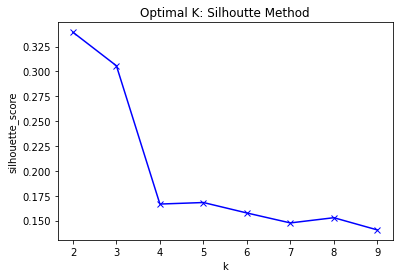

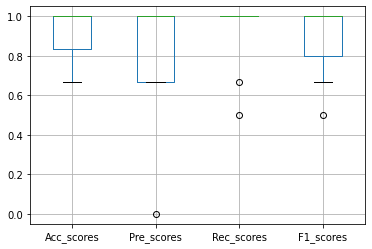

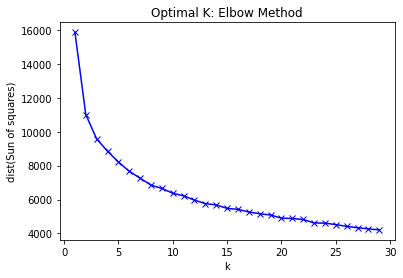

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [3 0 0 2 0 2 0 2 2 2 1 0 3 0 2 2 0 2 0 4 4 4 2 0 0 3 2 0 0 0 0 2 0 0 2 0 2
 1 1 4 1 4 3 4 4 0 4 2 4 1 1 1 1 0 1 1 0 2 1 4 4 4 2 4 2 0 4 1 2 1 0 2 2 4
 1 0 4 3 3 1 4 2 3 0 4 0 4 0 4 4 1 4 1 1 0 0 4 4 4 4 1 4 1 4 4 2 4 1 3 4 4
 4 2 4 4 4 4 2 2 0 4 0 3 4 1 1 1 0 4 0 4 0 0 1 0 1 1 1 0 4 1 0 4 1 1 4 2 4
 4 1 4 2 2 4 4 1 0 1 1 1 4 0 0 4 0 1 1 0 0 1 4 1 2 4 1 1 2 0 1 1 3 3 0 4 1
 4 0 1 1 1 2 1 1 2 2 1 2 0 0 0 4 0 3 2 4 1 4 0 4 1 0 1 3 0 2 2 4 1 0 0 1 4
 4 0 1 1 4 1 1 2 0 1 1 0 4 1 3 0 1 0 1 1 2 1 0 4 1 2 4 4 3 1 3 0 0 4 1 1 4
 1 4 4 4 1 1 1 1 1 1 4 1 4 1 2 1 4 1 1 1 1 1 4 4 4 1 1 1 1 1 1 1 1 1 1 4 1
 1 2 1 4 0 4 3 1 1 1 1 0 0 0 4 4 1 1 0 4 0 4 3 4 4 4 0 4 4 1 1 4 4 1 2 3 0
 1 4 4 1 4 1 1 1 1 1 1 0 3 1 0 3 2 1 0 0 1 4 2 1 1 2 4 1 1

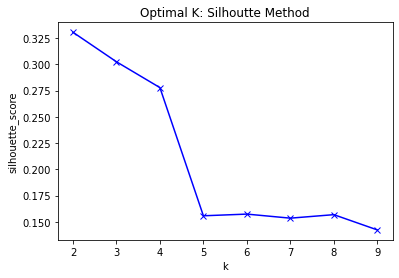

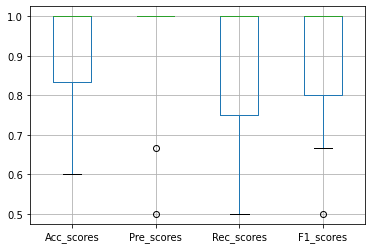

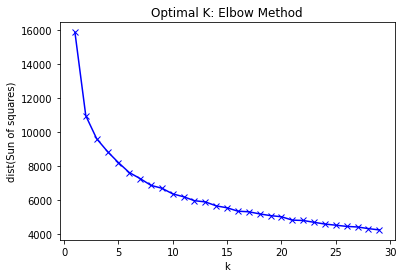

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [4 1 1 3 1 3 1 3 3 3 2 1 4 2 3 3 2 3 1 2 2 0 3 1 1 4 3 1 3 1 1 3 1 1 3 1 3
 2 2 3 2 0 4 3 2 1 0 3 2 2 2 2 2 1 2 2 1 3 2 0 0 0 3 0 3 3 0 2 3 2 1 0 3 2
 2 1 0 4 4 2 0 3 4 1 2 1 0 1 0 3 2 2 2 2 3 1 0 0 2 0 2 0 2 0 0 3 0 2 4 0 0
 0 3 0 0 2 0 3 3 1 2 1 4 2 2 2 2 1 3 1 0 1 1 2 1 2 2 2 1 0 2 1 0 2 2 0 3 0
 2 2 0 3 3 2 0 2 1 2 2 2 0 1 1 0 1 2 2 1 1 2 2 2 3 0 2 0 3 3 2 2 4 4 1 2 2
 0 1 2 0 2 3 2 2 3 3 2 3 1 1 3 0 1 4 3 0 2 0 1 3 2 1 2 4 3 3 3 0 0 1 1 2 2
 0 3 2 2 2 2 2 3 1 2 2 1 0 2 4 1 2 1 2 2 3 2 1 0 2 3 0 2 4 2 4 1 1 0 4 3 4
 3 1 2 1 2 1 1 0 2 2 0 2 2 4 0 1 0 2 1 2 2 1 2 1 3 2 2 0 2 0 0 3 2 0 2 2 2
 2 2 2 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 0 2 2 1 3 2 0 2 2 2 2 2 0 0 2 2 2 0 2
 0 0 0 0 2 2 2 0 2 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 3 2 2 0 2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [1.  1.  1.  1.  1.  1.  1.  1.  1.  0.6]
Precision: [1.         1.         1.         1.         1.         1.
 1.         1.         0.66666667 0.        ]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
F1 Score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
Average Accuracy: 0.96 (+/- 0.24)
Average Precision: 0.87 (+/- 0.61)
Average Recall: 0.90 (+/- 0.60)
Average F1 Score: 0.90 (+/- 0.60)
-------------------------------------------------------
Begin process
-------------------------------------------------------


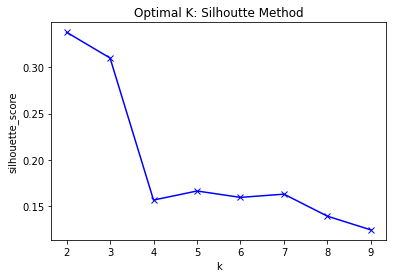

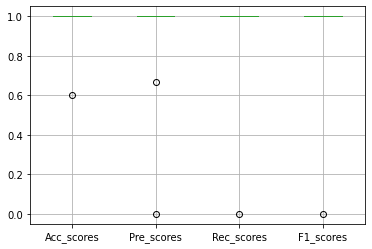

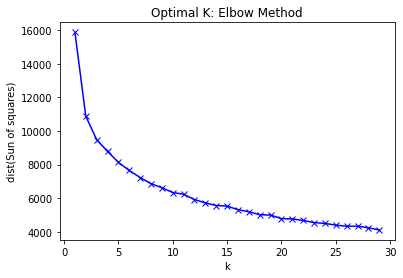

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [4 2 2 0 2 0 2 0 0 0 3 2 4 2 0 0 2 0 2 3 3 1 0 2 2 4 0 2 0 2 4 0 2 2 0 2 0
 3 3 0 3 1 4 0 3 2 1 0 3 3 3 3 3 2 3 3 2 0 3 1 1 1 0 1 0 0 1 3 0 3 2 1 0 3
 3 2 1 4 4 3 1 0 4 4 3 2 1 2 1 1 3 3 3 3 2 2 3 1 3 1 3 1 3 1 1 0 1 3 4 1 1
 1 0 1 1 3 1 0 0 2 3 2 4 3 3 3 3 2 1 2 1 2 2 3 2 3 3 3 2 1 3 2 1 3 3 1 0 1
 3 3 1 0 0 3 1 3 2 3 3 3 1 2 4 1 2 3 3 2 2 3 3 3 0 1 3 3 0 0 3 3 4 4 2 3 3
 1 2 3 3 3 0 3 3 0 0 3 0 2 2 0 1 2 4 0 1 3 1 2 0 3 2 3 4 1 0 0 1 1 2 2 3 3
 1 2 3 3 3 3 3 0 2 3 3 2 1 3 4 2 3 2 3 3 0 3 2 1 3 0 1 3 4 3 4 2 2 1 4 0 4
 0 2 3 2 3 2 4 1 3 3 1 3 3 4 1 2 1 3 2 3 3 2 3 2 0 3 3 1 3 1 3 0 3 1 3 3 3
 3 3 3 1 4 1 4 1 3 3 3 3 3 3 3 3 3 3 1 3 3 2 0 3 1 2 3 4 3 3 3 3 2 2 2 1 1
 3 3 2 3 2 1 4 3 1 1 2 1 1 3 3 3 1 3 0 4 2 3 1 1 3 1 3 3 3

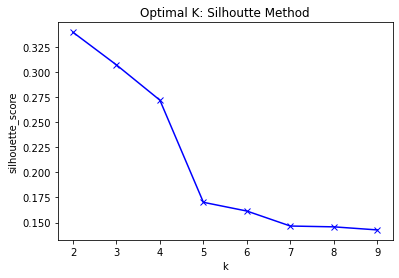

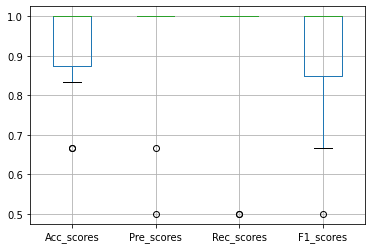

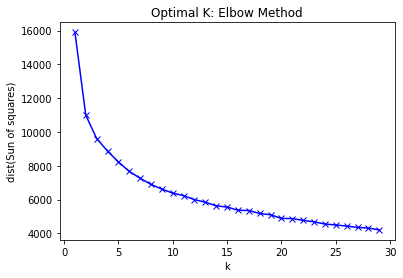

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [0 4 4 2 4 2 4 2 2 2 3 4 0 4 2 2 4 4 4 1 1 1 2 4 4 0 2 4 4 4 0 2 4 4 4 4 4
 3 3 4 3 1 0 4 3 4 1 2 1 3 3 3 3 4 3 1 4 4 3 1 1 1 2 1 4 4 1 3 2 3 4 2 4 1
 3 4 1 0 0 3 1 2 0 4 1 4 4 4 1 1 3 4 3 3 4 4 1 1 1 1 3 1 3 1 1 2 1 3 0 1 1
 1 2 1 1 1 1 4 2 4 1 4 0 1 3 3 3 4 1 4 1 4 4 3 4 3 3 3 4 1 1 4 1 3 3 1 2 1
 3 3 1 2 2 1 1 3 4 3 3 3 1 4 0 1 4 3 3 4 4 3 1 3 4 1 3 1 2 4 3 3 0 0 4 3 3
 1 4 3 1 3 2 3 3 2 2 3 2 4 4 4 1 4 0 2 1 3 1 4 1 3 4 3 0 2 2 2 1 1 4 4 3 1
 1 4 3 3 1 3 3 2 4 3 3 4 1 3 0 4 3 4 3 3 2 3 4 1 3 2 1 1 0 3 0 4 4 1 0 2 0
 4 4 3 4 3 4 0 1 3 3 1 3 1 0 1 4 1 3 4 3 3 4 1 4 4 3 3 1 3 2 1 2 3 1 3 3 3
 3 3 3 1 0 1 0 1 3 3 3 3 3 3 3 3 3 3 1 3 3 4 2 3 1 4 1 0 3 3 3 3 4 4 4 1 1
 3 3 4 1 4 1 0 1 1 1 4 1 1 3 3 1 1 3 2 0 4 3 1 1 3 1 1 3 3

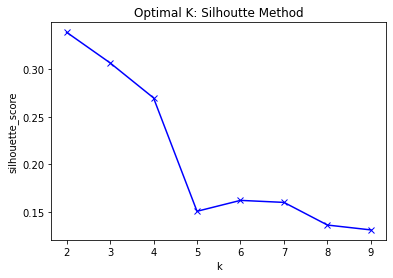

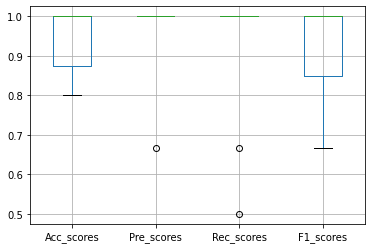

In [0]:
for train_index, test_index in Folds.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    
  std_scaled=StandardScaler().fit(xtrain)
  xtrain=std_scaled.transform(xtrain)
  xtest=std_scaled.transform(xtest)

  print('Begin process')
  print('-----------'*5)
  # elbow and silhoutte method
  elbow()
  silhoutte()
  #run kmeans
  numk=5
  #model created using kmeans object and fitting kmeans object to dataset
  kmeans=KMeans(n_clusters=numk)
  kmeans = kmeans.fit(xtrain)

  cluster_ytrain = kmeans.predict(xtrain)
  print('-----------'*5)
  print('-----------ytrain-------------')
  print('-----------'*5)
  #Predict the closest cluster each sample
  print('Closest Clusters: \n', cluster_ytrain)
    #gets each clusters centroid points
  centroids=kmeans.cluster_centers_
  print('centroids \n', centroids)
  print('-----------'*5)
  print('cluster center shape \n',kmeans.cluster_centers_.shape)
  print('-----------'*5)
  
  
  #append the cluster labels into df
  df0=pd.DataFrame(data=xtrain)
  df0['clusters']=cluster_ytrain
  
  #prints the clusters labels in ascending order
  print('-----------'*5)
  print('clusters \n',df0.clusters.unique())
  print('-----------'*5)
  print('number of samples per cluster \n', Counter(cluster_ytrain))
  print('-----------'*5)

  #Assigning xtest samples
  cluster_ytest =  kmeans.predict(xtest)

  df1=pd.DataFrame(data=xtest)
  df1['clusters']=cluster_ytest
  print('---------ytest--------------')
  #Predict the closest cluster each sample
  print('-----------'*5)
  print('Closest Clusters: \n', cluster_ytest)
  RFC=RandomForestClassifier()
  print('-----------'*5)
  baseline(RFC,df1,ytest)
  print('-----------'*5)
